# Breast Cancer Detection using SVM and KNN.

<img src='http://i.dawn.com/large/2018/10/5bcd8089ac890.jpg?r=1468962792' width="800" height="100">

In [33]:
# importing required libraries
import sys
import numpy
import matplotlib
import pandas
import sklearn

print("Python {}".format(sys.version))
print("Numpy {}".format(numpy.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Pandas {}".format(pandas.__version__))
print("Sklearn {}".format(sklearn.__version__))

Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Numpy 1.16.2
Matplotlib 3.0.3
Pandas 0.24.1
Sklearn 0.20.3


In [32]:
# importing all the required packages
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names)

In [9]:
# Preprocess the data
df.replace('?', -99999, inplace=True)
print(df.axes)

df.drop(['id'], 1, inplace=True)

# Print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [10]:
# Data set Visualisation
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


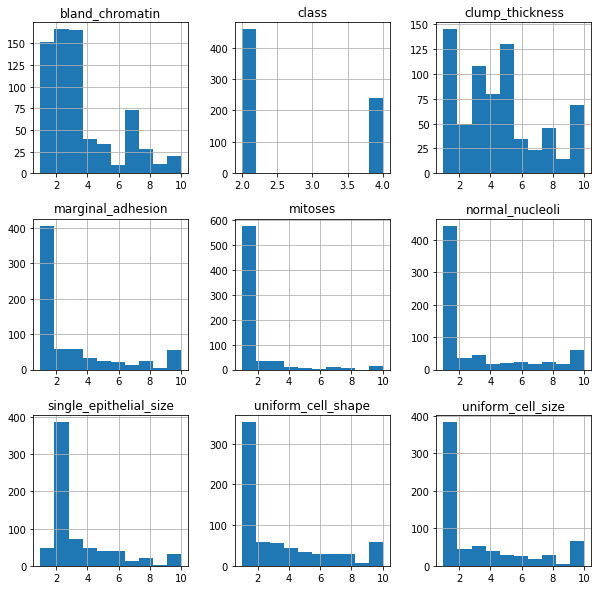

In [11]:
# Plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()

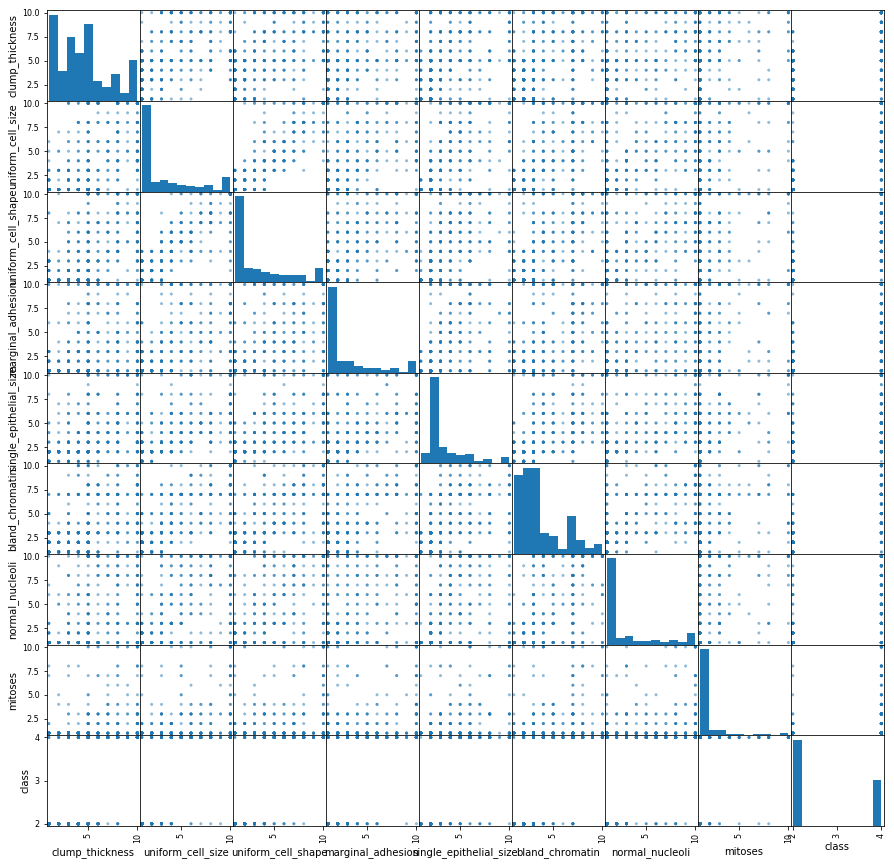

In [12]:
# Create scatter plot matrix
scatter_matrix(df, figsize=(15, 15))
plt.show()

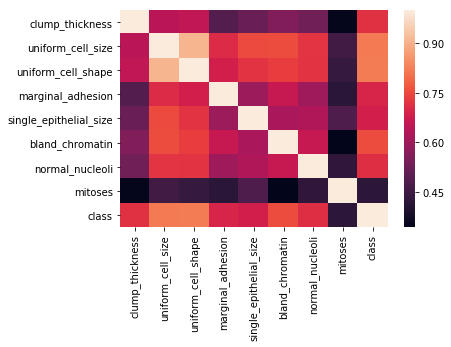

In [13]:
# Correlation matrix
sns.heatmap(df.corr())

In [27]:
# Create X and y datasets for training
from sklearn.model_selection import train_test_split
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
# Specify testing options
seed = 8
scoring = 'accuracy'

In [30]:
# Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.971396 (0.016345)
SVM: 0.958864 (0.017928)


In [31]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.95      0.98      0.96        82
           4       0.96      0.93      0.95        58

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

SVM
0.95
              precision    recall  f1-score   support

           2       1.00      0.91      0.96        82
           4       0.89      1.00      0.94        58

   micro avg       0.95      0.95      0.95       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.95      0.95       140



### Conclusion: KNN accuracy: 0.957  and  SVM accuracy: 0.95

Precision is measure of false-positive prediction.
High precision means we dont have many false-positives.